## 回归模型分析项目 - 购房价格预测分析
* 项目分析目标：根据79个房屋信息特征属性，预测每个房屋的最终销售价格

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
plt.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


### 导入数据

In [2]:
df_train = pd.read_csv('train.csv')

### 探索数据

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 理解每列特征的含义

*  'SalePrice':以美元为单位的房屋销售价格，是预测的目标变量；
*  'MSSubClass':建筑类；    
* ' MSZoning':城市分区； 
* ' LotFrontage'：与房子相连的街道； 
* ' LotArea'：地块面积；  
* 'Street',街道
* 'Alley',小巷通道的类型  
* 'LotShape',地块形状  
* 'LandContour',土地轮廓         
* 'Utilities',公共设施   
* 'LotConfig',地块配置
* 'LandSlope',地块斜坡   
* 'Neighborhood' 邻近地区 
* 'Condition1'靠近主干道或铁路,    
* 'Condition2'靠近第二条主干道或铁路 
* 'BldgType'建筑类型,    
* 'HouseStyle'住宅风格,  
* 'OverallQual'整体材料和表面质量,
* 'OverallCond'总体状况评分, 
* 'YearBuilt'建造年份
* 'YearRemodAdd'年度重修日 
* 'RoofStyle'屋顶样式,    
* 'RoofMatl'屋顶材料,  
* 'Exterior1st'房屋外部覆盖材料一, 
* 'Exterior2nd'房屋外部覆盖物材料 * 
* 'MasVnrType'砖石饰面类型 
* 'MasVnrArea'砖石饰面面积
* 'ExterQual'外部材料质量,
* 'ExterCond'外部材料的现状,
* 'Foundation'基础的类型,
* 'BsmtQual'地下室的高度,  
* 'BsmtCond'地下室情况, 
* 'BsmtExposure'地下室墙壁, 
* 'BsmtFinType1'地下室完工质量
* 'BsmtFinSF1'成品面积1,
* 'BsmtFinType2'第二成品区域的质量,
* 'BsmtFinSF2'成品面积2, 
* 'BsmtUnfSF'未完工地下室面积,
* 'TotalBsmtSF'地下室总面积, 
* 'Heating'供暖类型,
* 'HeatingQC'供暖质量,
* 'CentralAir'中央空调,
* 'Electrical'电气系统, 
* '1stFlrSF'一楼面积, 
* '2ndFlrSF'二楼面积,
* 'LowQualFinSF'低质量成品
* 'GrLivArea'生活区面积,
* 'BsmtFullBath'楼下全浴室,
* 'BsmtHalfBath'楼下半浴室,
* 'FullBath'全浴室,
* 'HalfBath半浴池'
* 'BedroomAbvGr'卧室数量,
* 'KitchenAbvGr'厨房数量,
* 'KitchenQual'厨房质量,
* 'TotRmsAbvGrd'总房间数(不包括浴室),
* 'Functional'家庭功能评级,
* 'Fireplaces'壁炉的数量,
* 'FireplaceQu'壁炉品质,
* 'GarageType'车库类型,
* 'GarageYrBlt'车库建造年份,
* 'GarageFinish'车库装修,
* 'GarageCars'车库容量,
* 'GarageArea'车库面积, 
* 'GarageQual'车库质量,
* 'GarageCond'车库条件,
* 'PavedDrive'铺面车道,
* 'WoodDeckSF 木质地板面积', 
* 'OpenPorchSF'开放式走廊面积,
* 'EnclosedPorch'封闭阳台面积, 
* '3SsnPorch'三季门廊面积,
* 'ScreenPorch'屏廊面积,
* 'PoolArea泳池面积',
* 'PoolQC'泳池质量,
* 'Fence'围栏质量, 
* 'MiscFeature'错误特征,
* 'MiscVal'错误值,
* 'MoSold'月销售额, 
* 'YrSold'年销售额, 
* 'SaleType'销售类型,
* 'SaleCondition'销售条件

通过数据探索，整个数据集包含离散值和连续值,需要对不同类型的特征做探索分析决策出重要的特征

### 分析目标

探索分析目标值分布情况，有哪些特征

In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

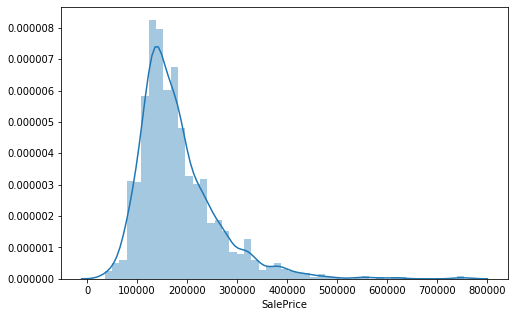

In [23]:
plt.rcParams['figure.figsize'] = (8,5)
sns.distplot(df_train['SalePrice'])

目标值没有0或负数，分布也比较集中，符合正态分布，说明销售价格数据正常

### 探索和目标值相关联的重要特征

#### 目标变量与连续变量关系分析

In [89]:
df_train.columns[df_train.dtypes == dtype('int64')]

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [90]:
df_train.columns[df_train.dtypes == dtype('float64')]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

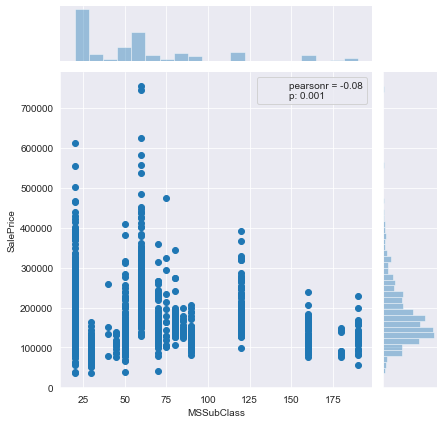

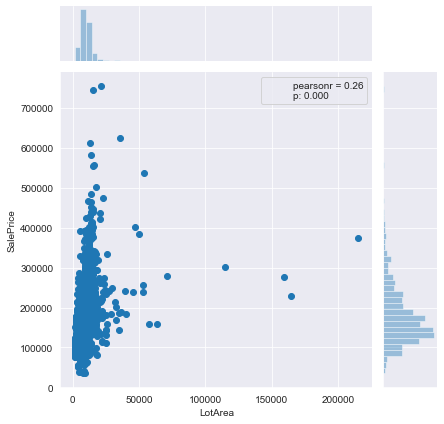

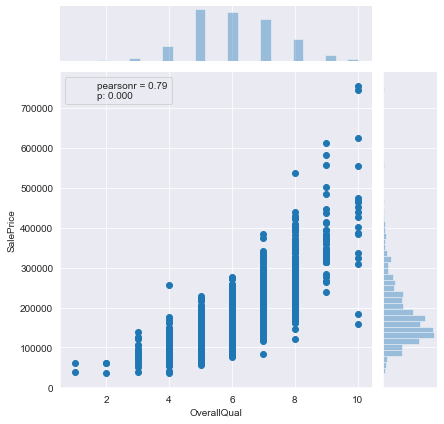

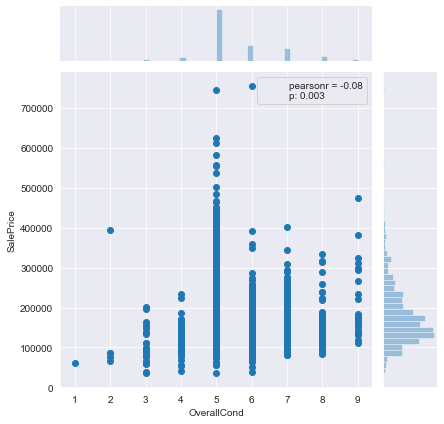

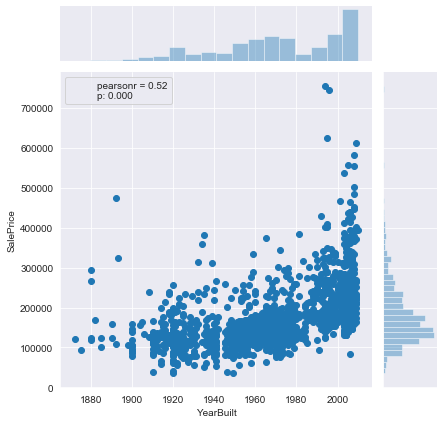

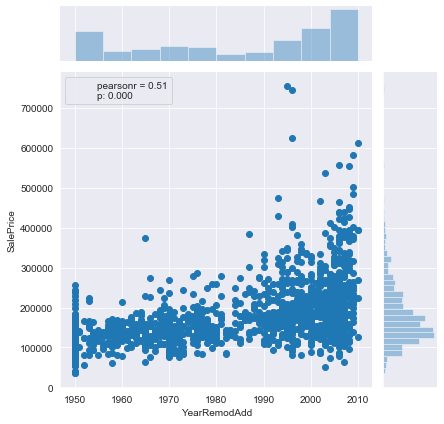

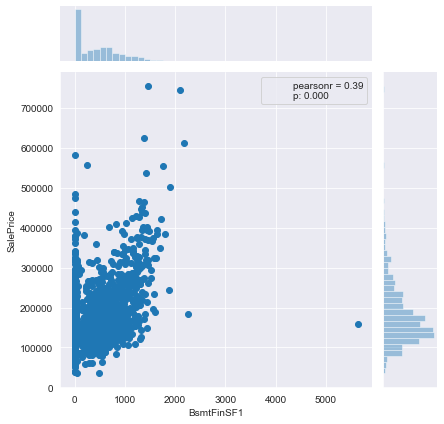

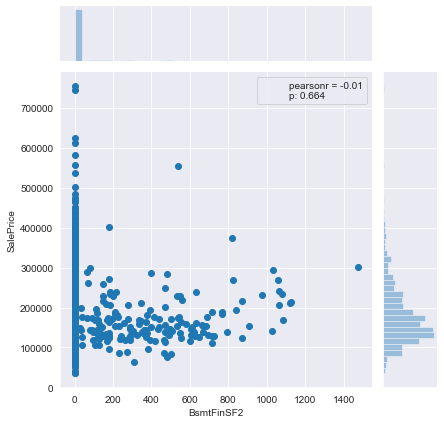

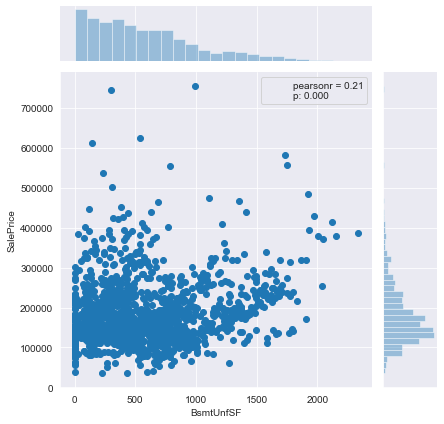

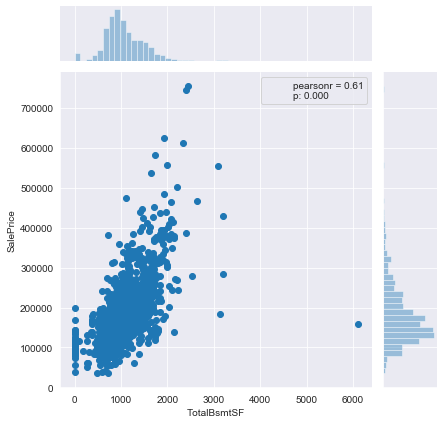

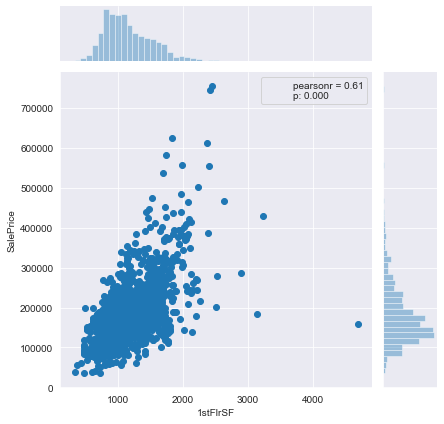

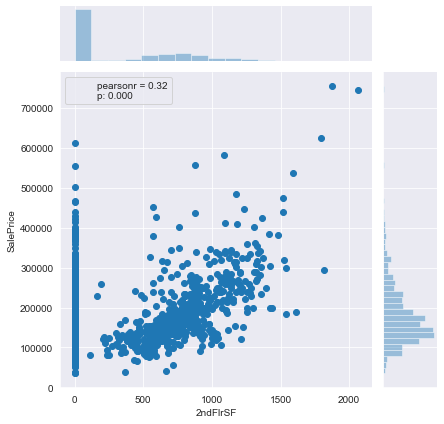

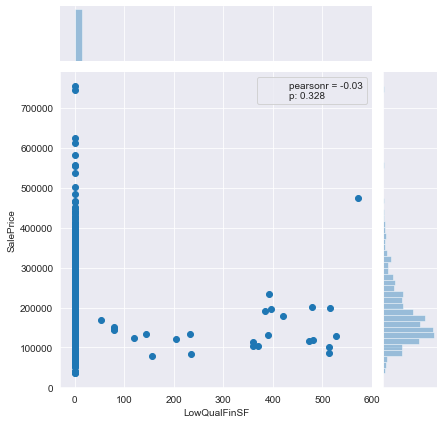

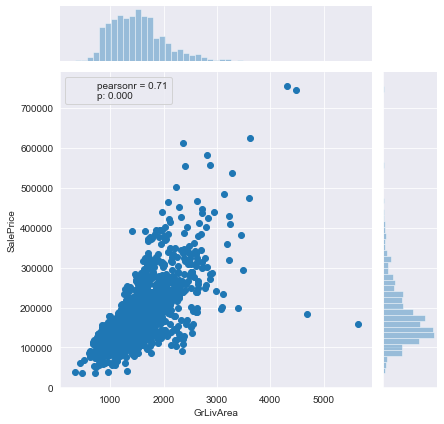

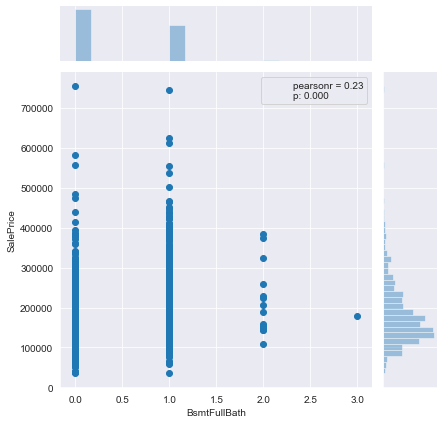

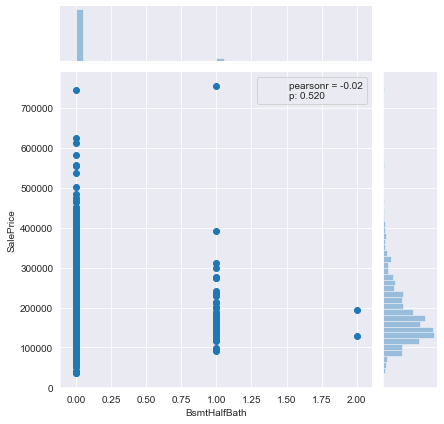

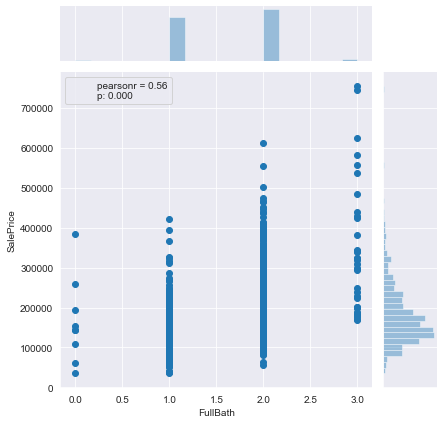

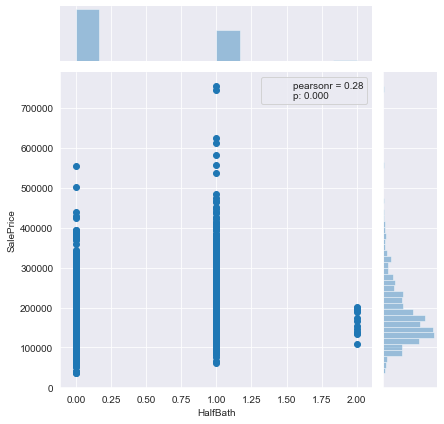

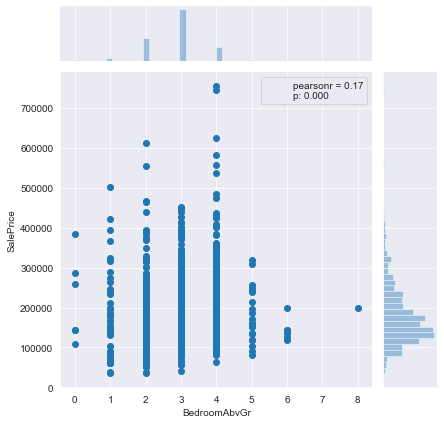

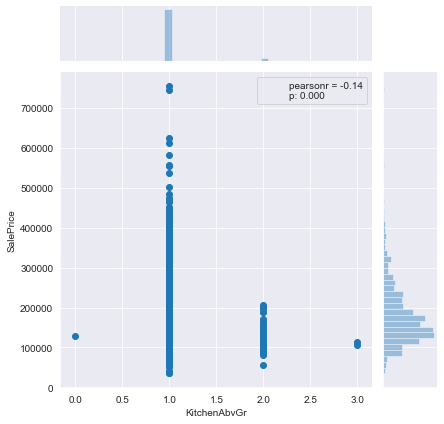

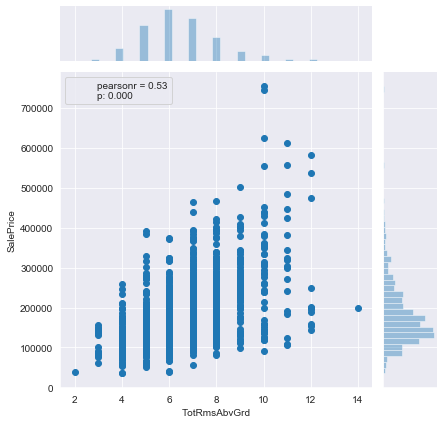

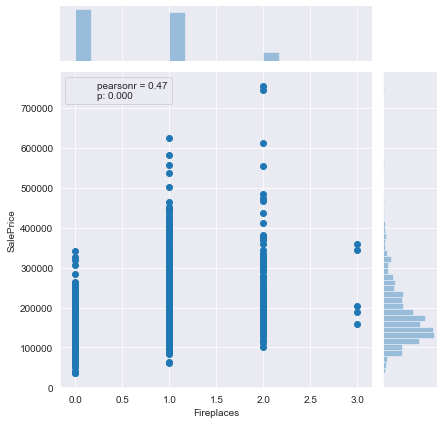

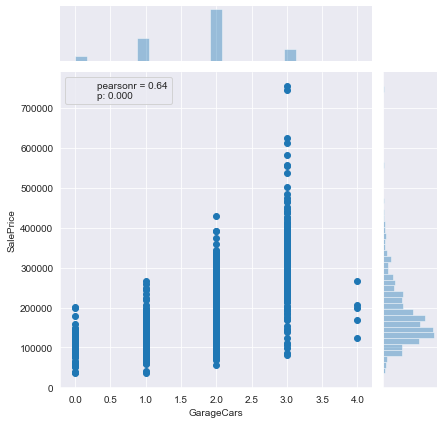

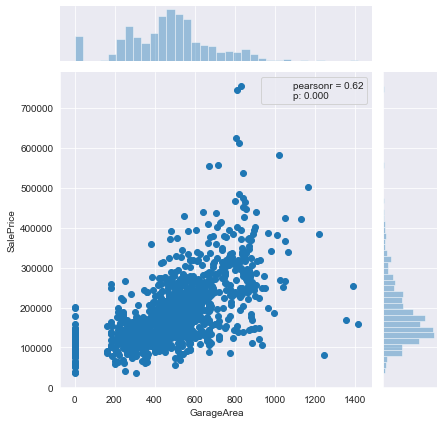

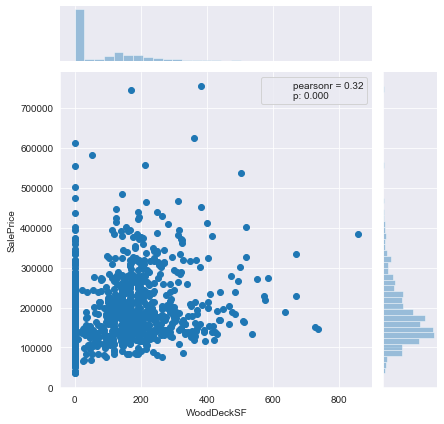

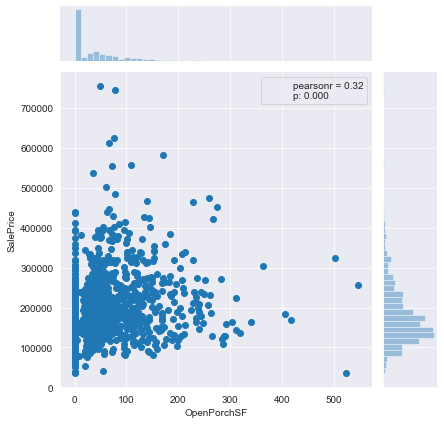

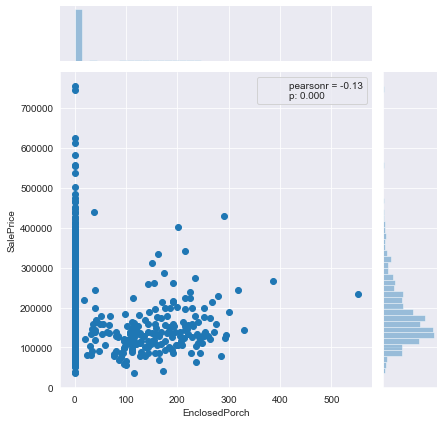

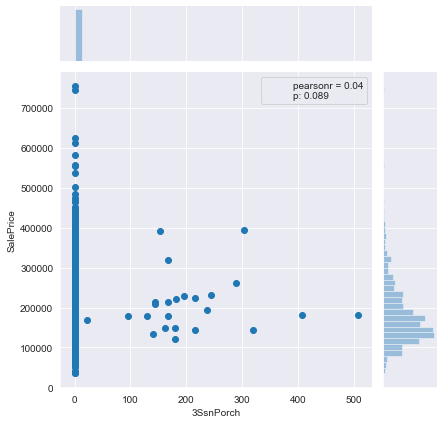

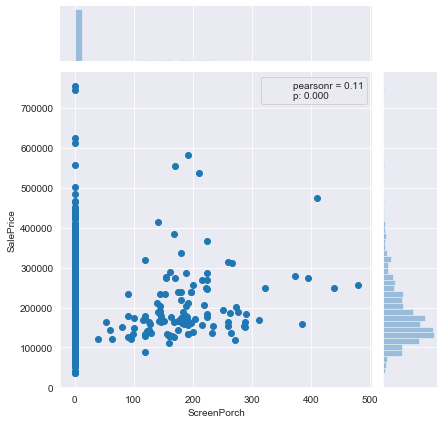

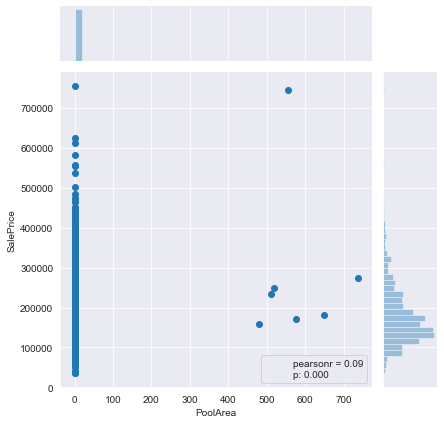

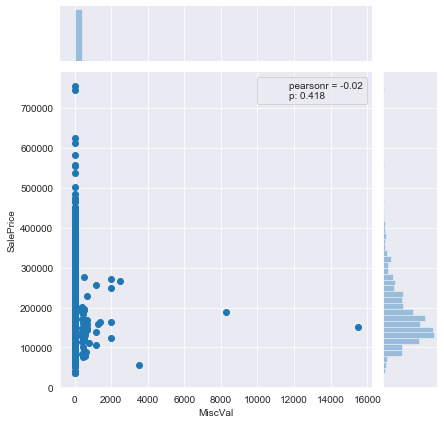

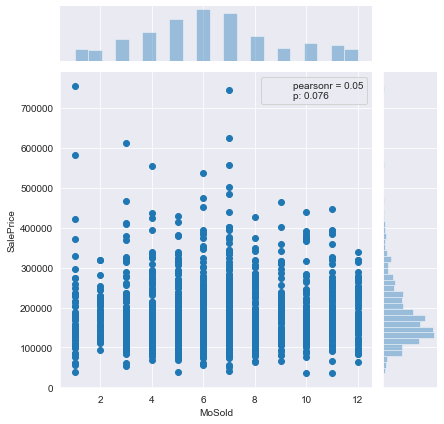

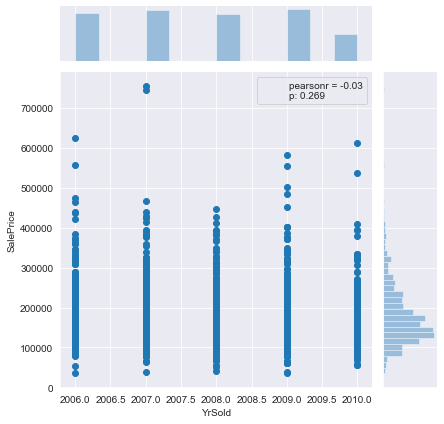

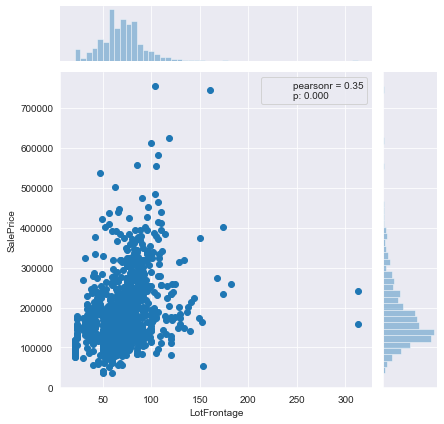

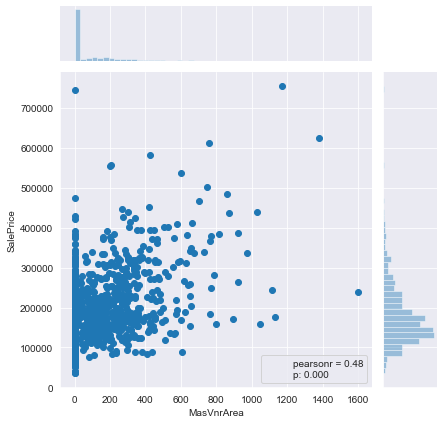

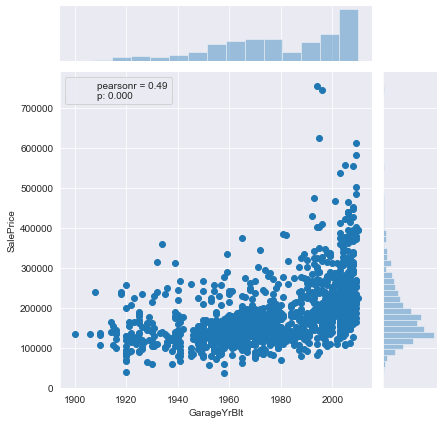

In [92]:
def correlation(x_values):
    def pearson(x,y):
        return stats.pearsonr(x,y)
    g = sns.jointplot(x = x_values, y = 'SalePrice',data = df_train)
    return g.annotate(pearson,template='pearsonr = {val:.2f}\np: {p:.3f}')

num_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for i in num_columns:
    correlation(i)

利用皮尔逊相关系数的统计理论方法，从上面的线性散点图形和数据可以看出，OverallQual、YearBuilt、TotalBsmtSF、1stFlrSF、FullBath、GrLivArea、GarageCars、GarageArea跟SalePrice的相关系数较大，表明其相关性较高，可作为目标值SalePrice的重要特征。其它连续特征因子的相关性较低。

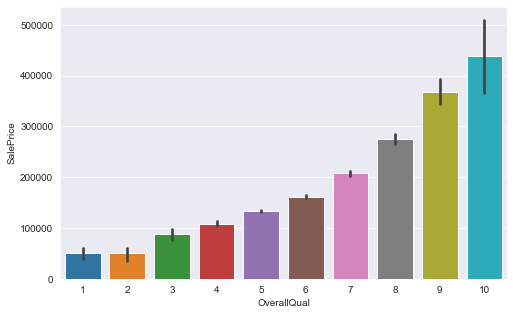

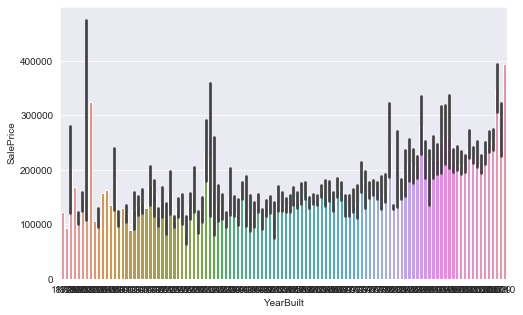

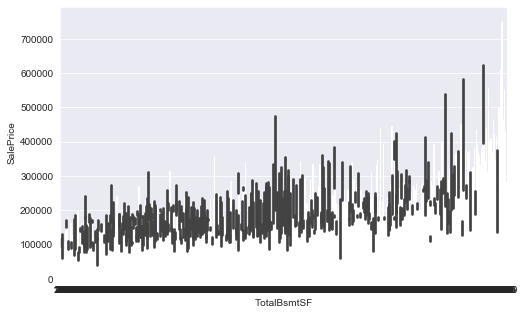

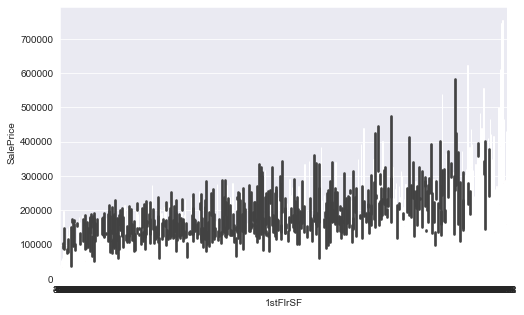

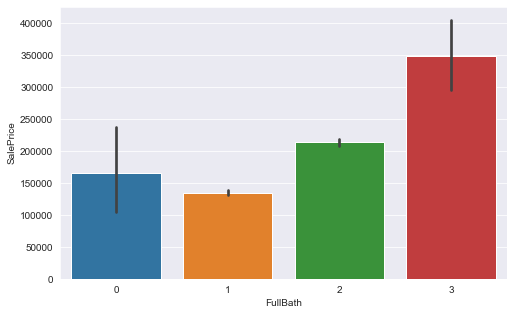

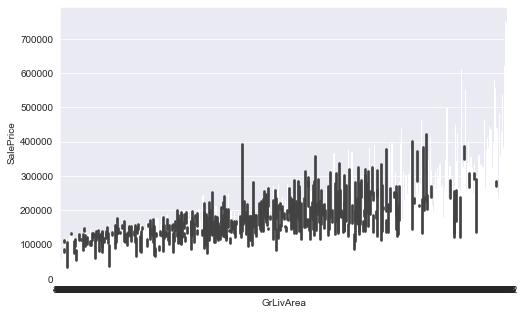

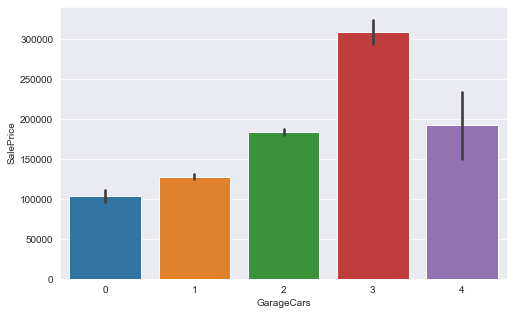

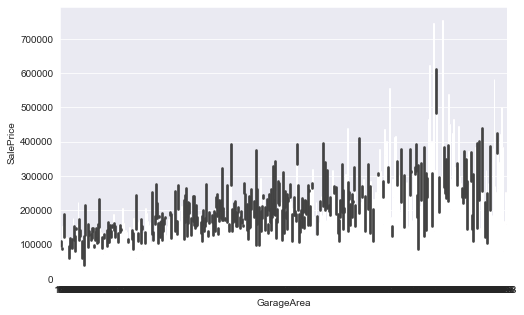

In [115]:

num_columns = ['OverallQual','YearBuilt',
               'TotalBsmtSF','1stFlrSF','FullBath','GrLivArea','GarageCars','GarageArea']

for cat_values in num_columns:
    sns.barplot(x = cat_values,y = "SalePrice",data = df_train)
    plt.show()

#### 目标变量与离散变量关系分析

In [93]:
df_train.columns[df_train.dtypes == dtype('object')]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

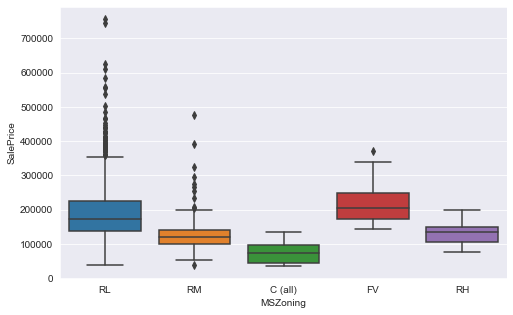

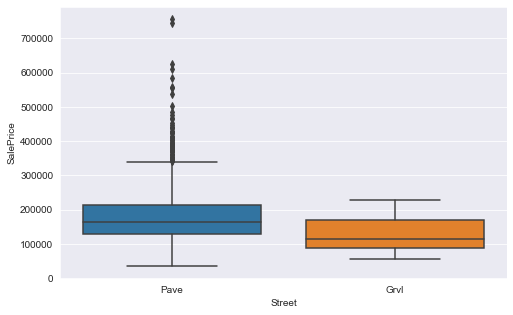

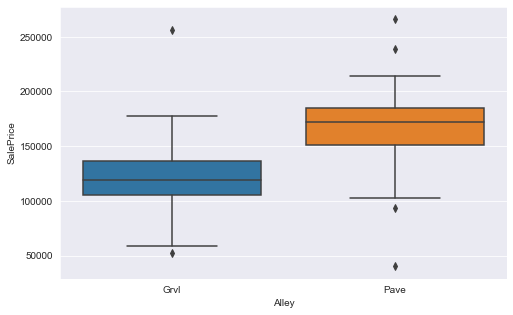

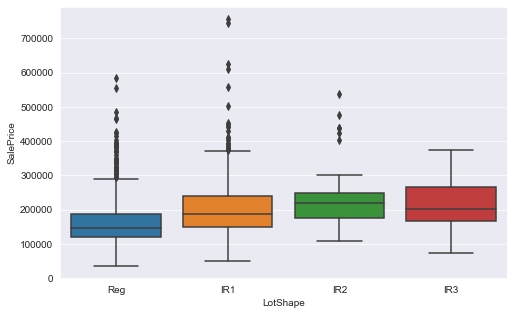

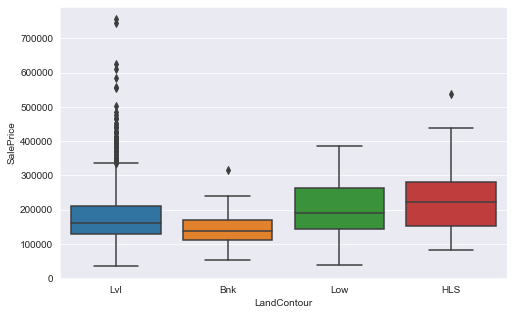

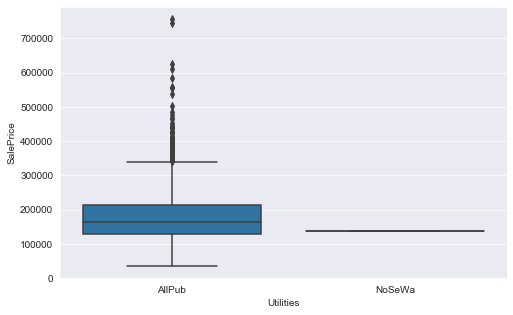

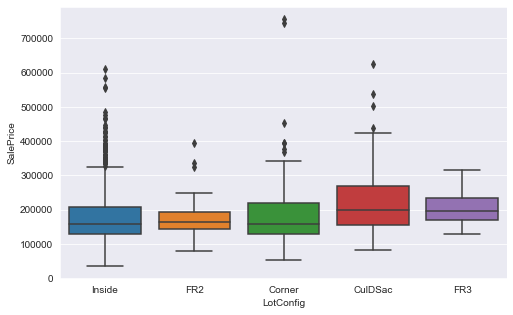

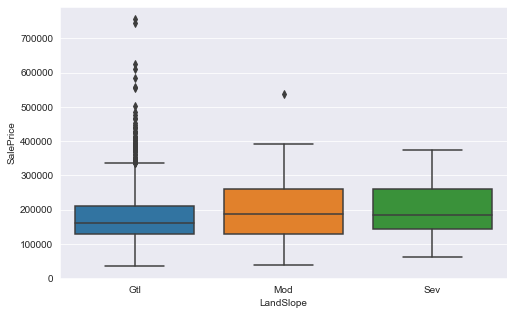

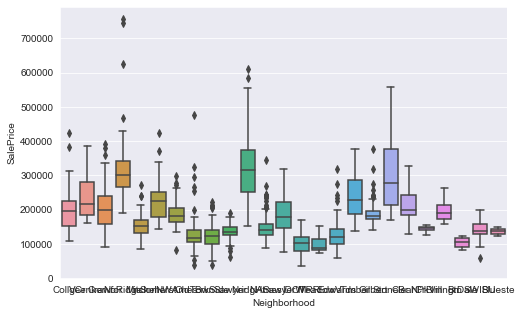

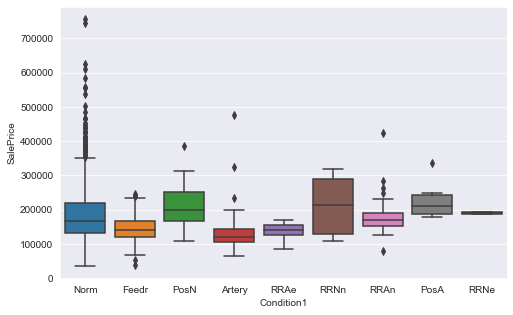

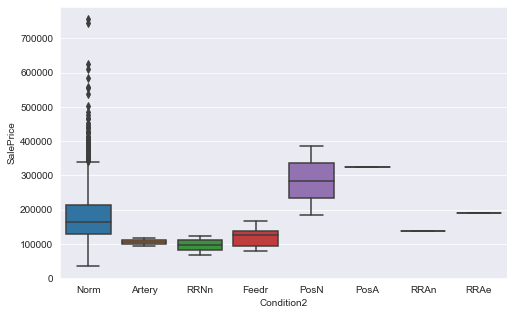

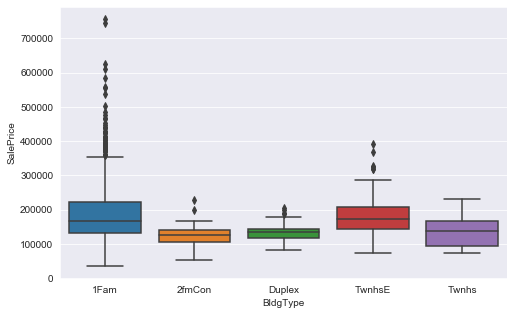

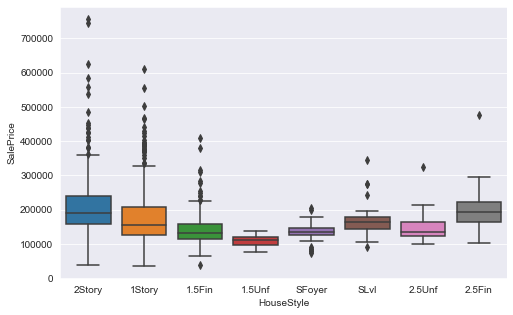

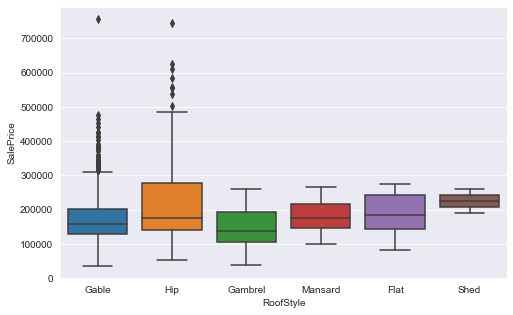

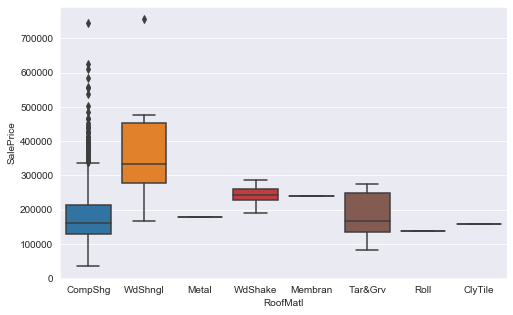

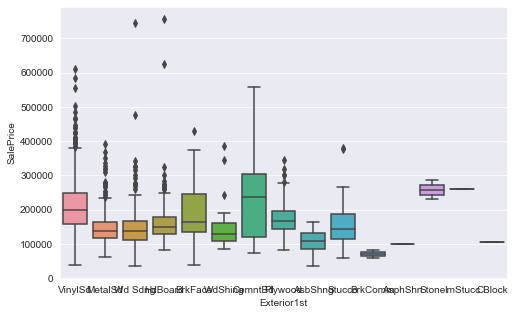

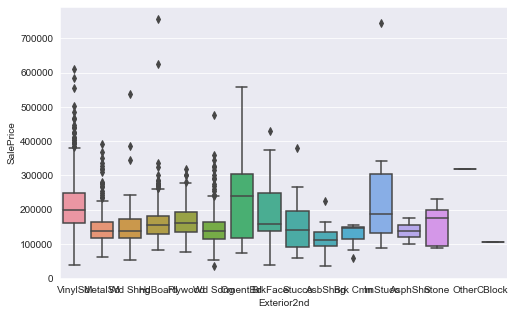

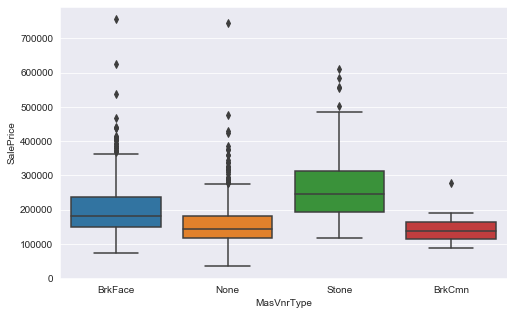

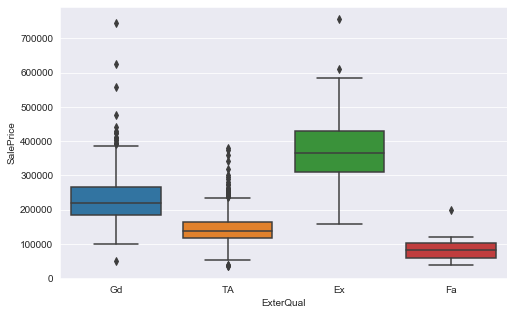

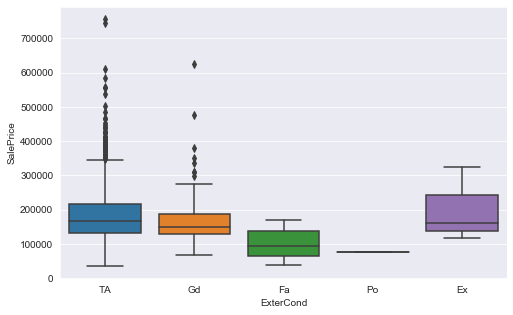

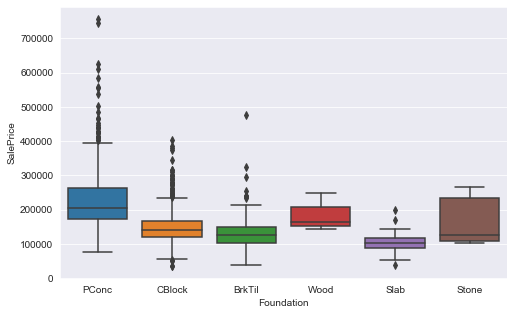

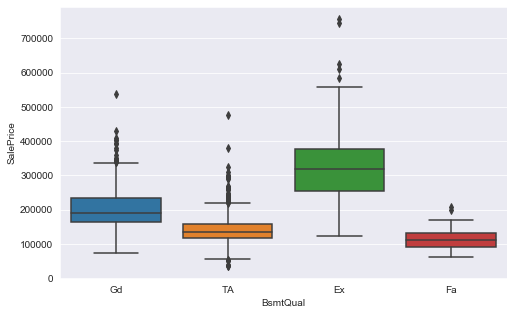

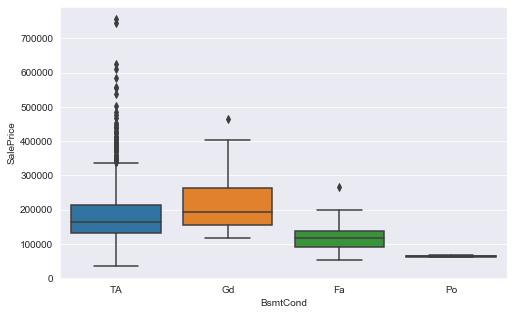

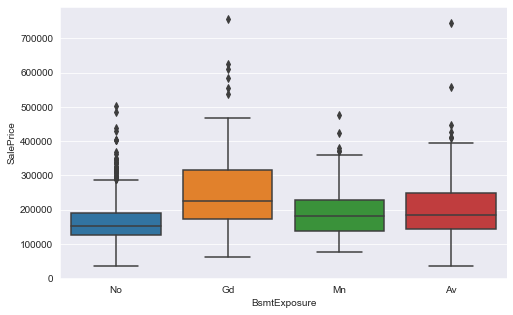

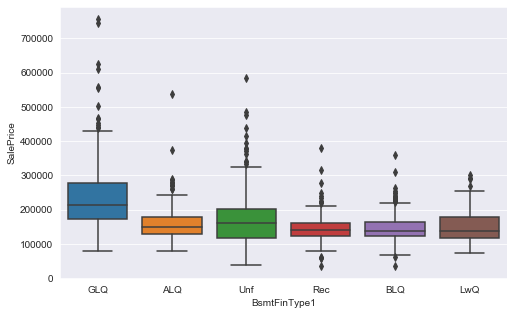

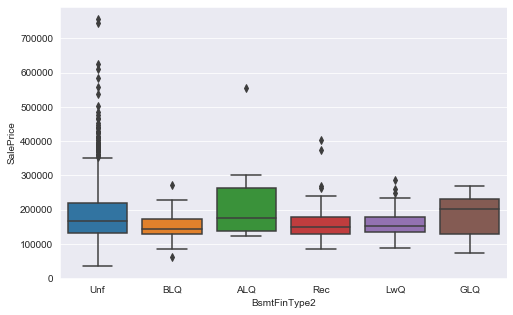

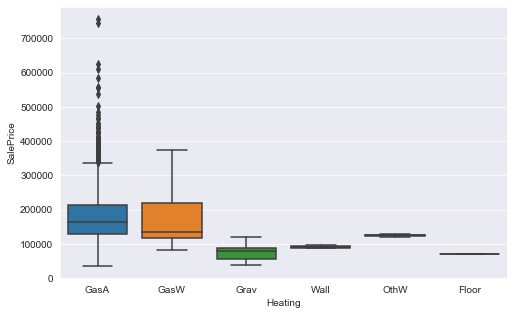

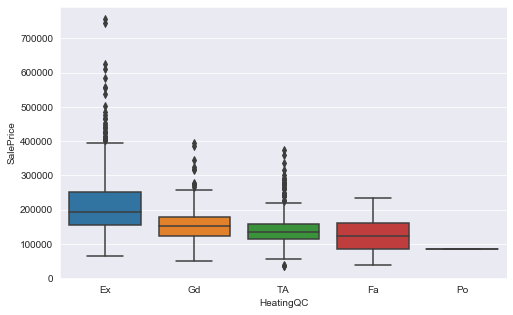

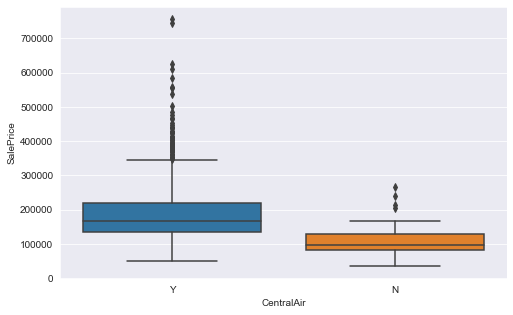

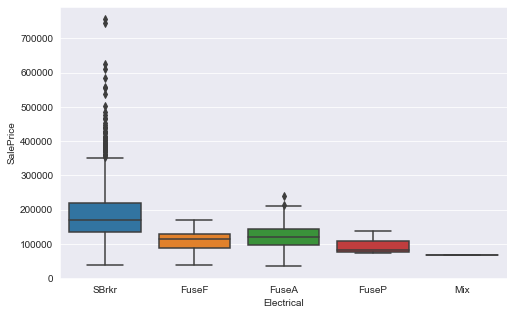

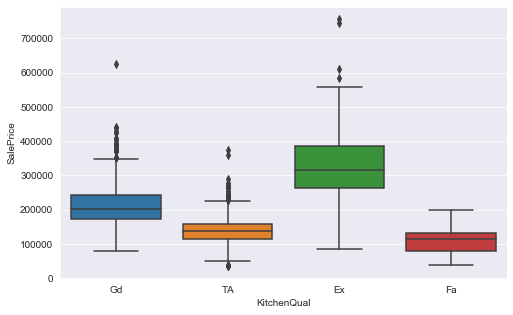

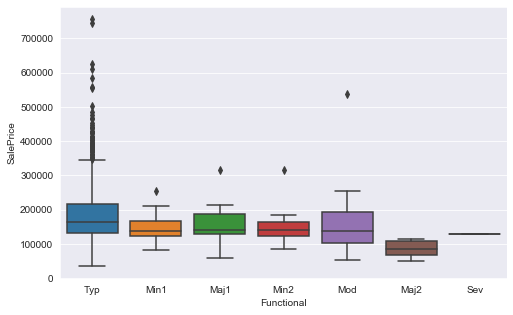

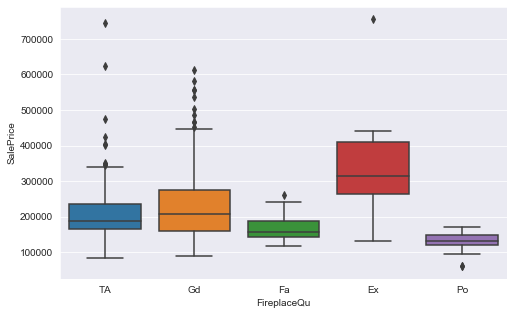

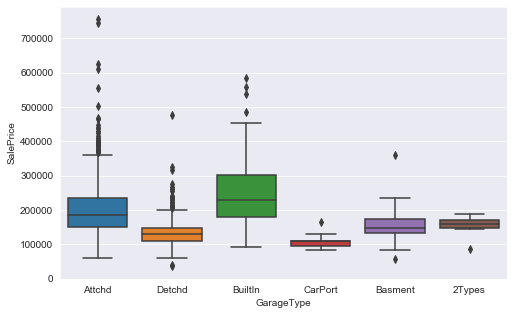

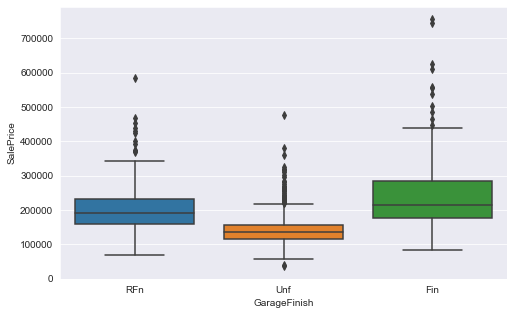

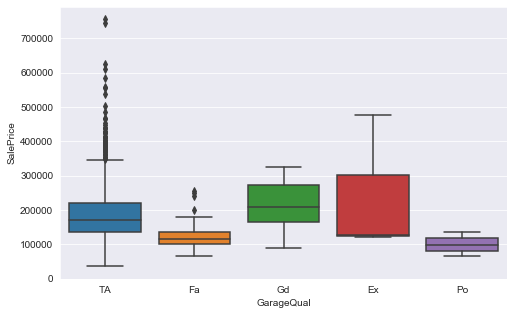

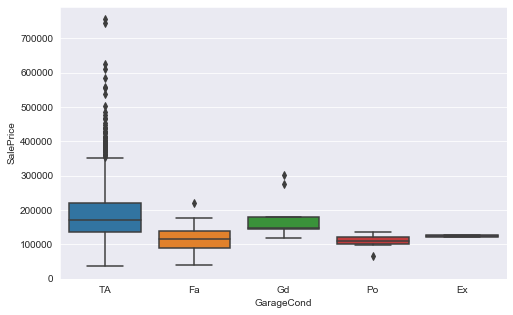

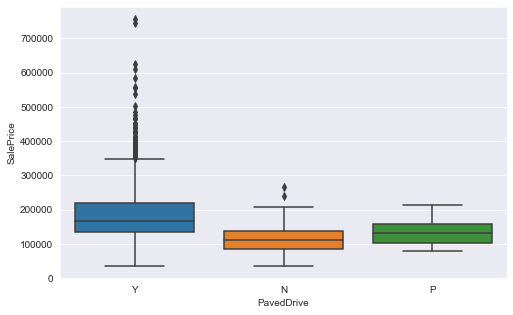

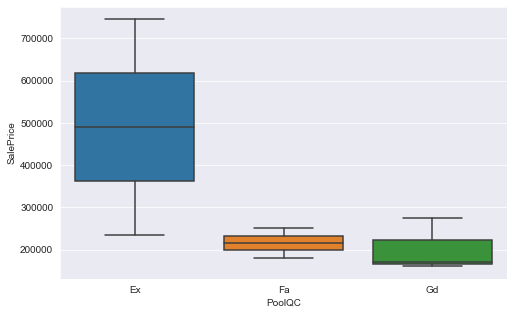

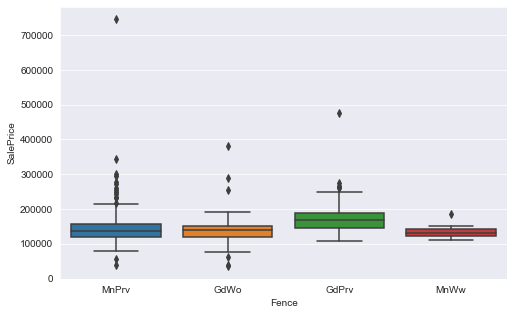

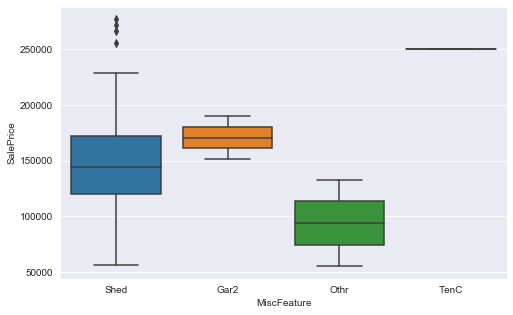

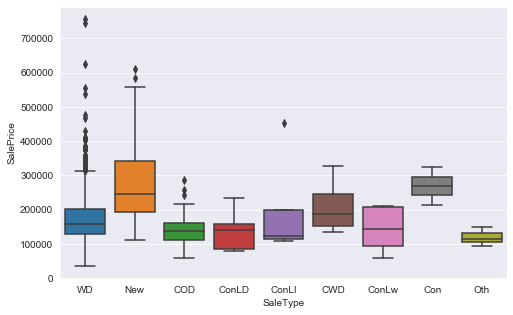

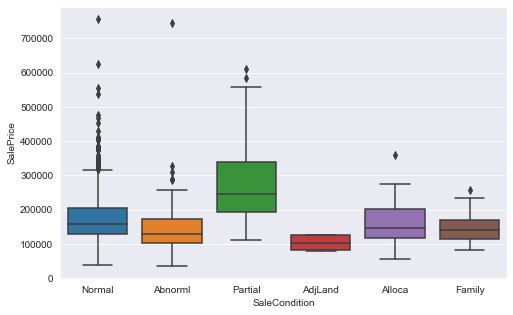

In [111]:
num_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for cat_values in num_columns:
    sns.boxplot(x = cat_values,y = "SalePrice",data = df_train)
    plt.show()

利用箱型图可以反映出离散变量在不同分类值上数据的变化波动情况，范围变化浮动越大，说明两者之间越存在相关性，但是通过观察以上每一个分类值上目标变量数据的变动程度，发现分类变量的不同取值很少会对目标变量产生影响

### 更全面的特征分析

利用热力图观察所有变量之间的相关性，对整个数据集的所有特征进行分析，挑选出重要的特征

#### 特征与特征之间的相关性

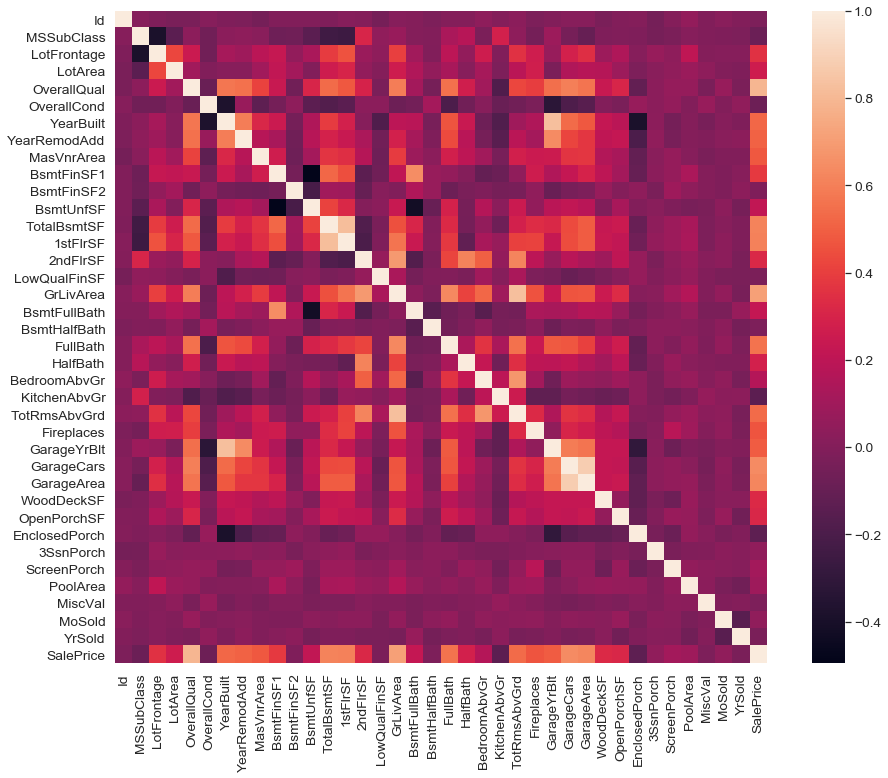

In [181]:
plt.rcParams['figure.figsize'] = (16, 12)
corrmatrix = df_train.corr()
sns.heatmap(corrmatrix,square=True,vmax=1.0)

根据热力图可以快速锁定两个发黄发亮的方块区域。 第一块是TotalBsmtSF与1stFlrSF，第二块是与Garage相关的变量。这些变量之间存在相关性，对于目标变量，由于存在共线性，对影响目标变量相同的特征，取其中一个就可以

#### 房屋价格与其他特征之间相关性

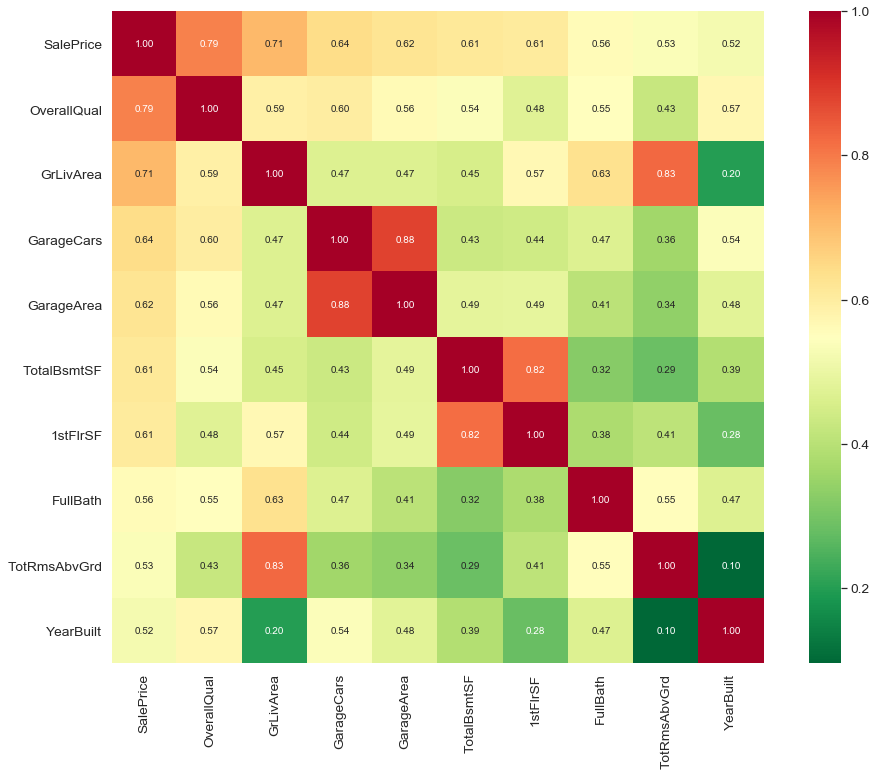

In [177]:
k =10 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dfa_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='RdYlGn_r',fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

取前10个相关系数最高的特征与SalePrice房价的相关性比较，从而得出结论：
1. 'OverallQual', 'GrLivArea' , 'TotalBsmtSF' 这三个变量与 'SalePrice'有很强的线性关系
2. 'GarageCars' 和 'GarageArea'与'SalePrice'有很强的线性关系；但存在共线性，取与目标的关联性更强的GarageCars
3. 'TotalBsmtSF' 和 '1stFloor' 存在共线，取TotalBsmtSF；'TotRmsAbvGrd' 和 'GrLivArea'也存在共线，取 GrLivArea
4. 最后两个FullBath，YearBuilt特征与SalePrice也有较好的线性关联性，这些都可以作为目标值的重要特征

#### 对关联性最强的重要特征做深入分析

基于以上对特征分析的结论，对所有关联性最强的重要特征做深入分析，集中展现每个重要特征的成对变量关系分布

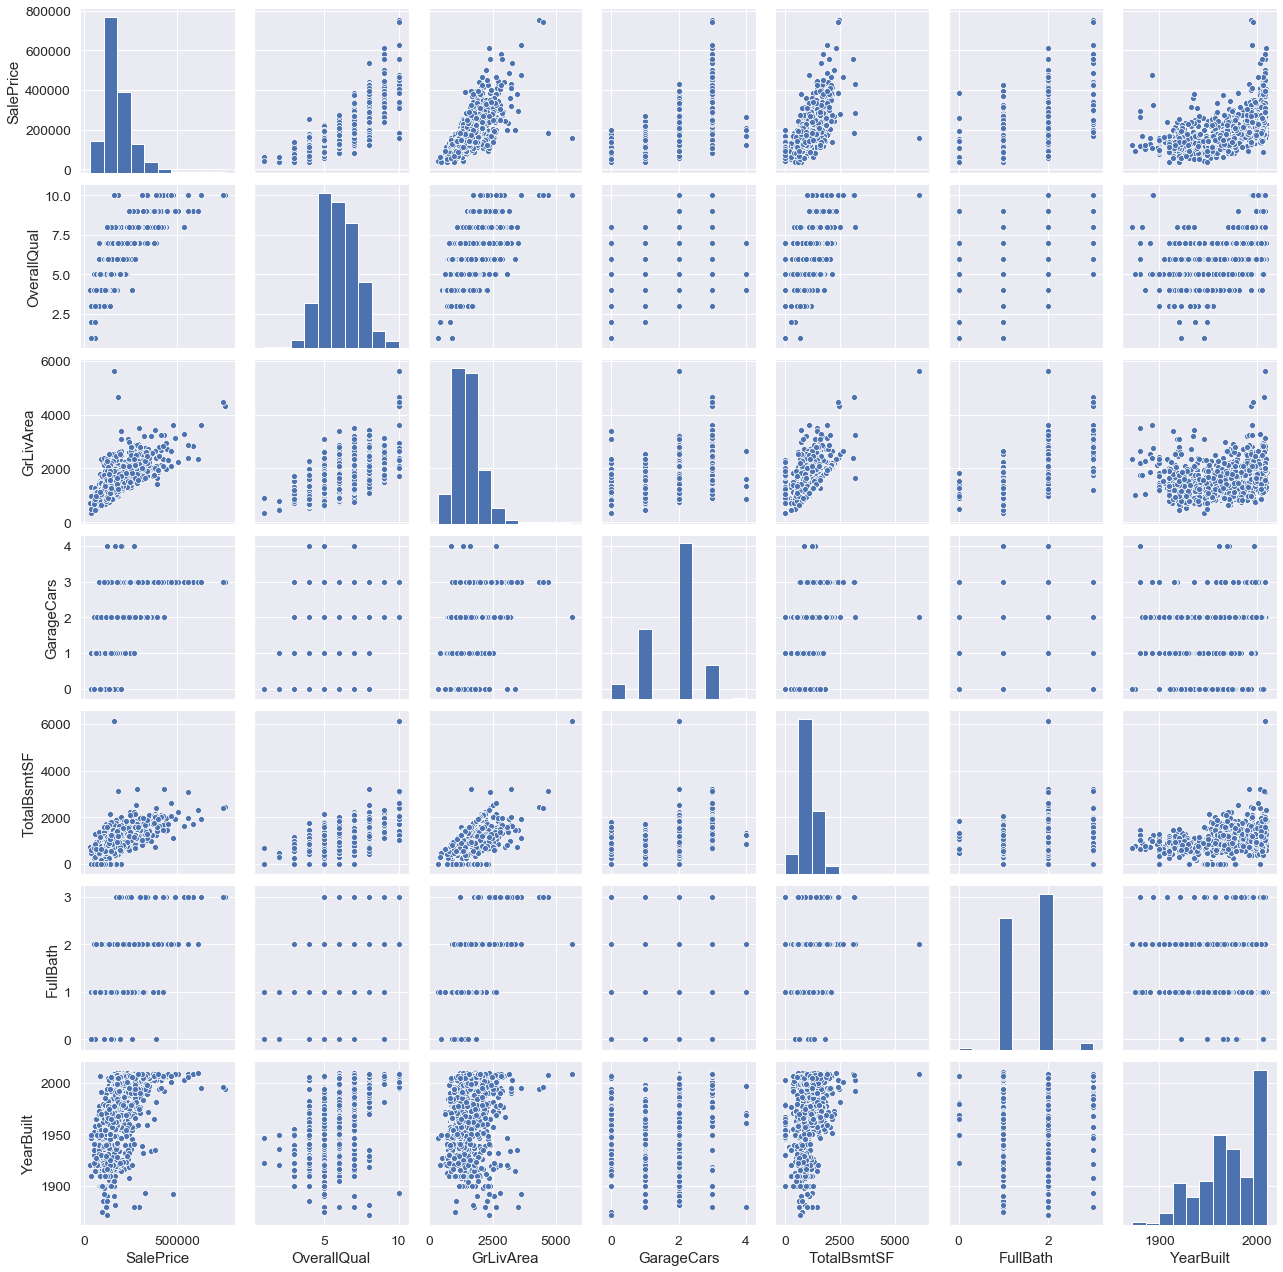

In [185]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'] # 关联性较强的特征
sns.pairplot(df_train[cols], size = 2.5)

根据两两变量成对关系分布图可以发现，每一个特征都与目标变量SalePrice产生相互关联性，从而证明这些特征信息对预测购房价格模型的重要性

### 处理缺失值Missing Value

统计每一列特征的缺失值以及占比，删除缺失值占比较大的无用特征

In [188]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [190]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

### 建立模型

#### 构建回归模型预测购房价格走势

In [192]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

LR_model = ols("SalePrice~C(OverallQual) +GrLivArea +C(GarageCars) + TotalBsmtSF +C(FullBath) + YearBuilt",data =df_train ).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     328.6
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -17310.
No. Observations:                1459   AIC:                         3.466e+04
Df Residuals:                    1439   BIC:                         3.477e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7.815e+05 

 模型拟合优度：R-squared = 0.813

#### 回归模型评估

通过线性拟合LR_model模型可汇总得到如下评估结论信息：
1. 判定系数 R-squared = 0.813，表示这是一个不错的模型拟合优度，直接证明了特征选择的正确性和对建模的重要性。
2. F检验的P-value值 Prob (F-statistic) = 0.00，在拒绝原假设所有系数都为0的情形下说明拟合后的模型特征系数不可能全部为0的结论。
3. 对于p-value值>0.05或0.01显著性水平的每一个特征系数都意味着没有对拟合预测的购房价格y值产生影响，这些特征可以摒弃不用。
4. 相对的，对于p-value值<=0.05或0.01显著性水平的每一个特征系数都表明对拟合预测的购房价格y值产生直接重大的影响。

#### 模型预测的购房价格置信区间

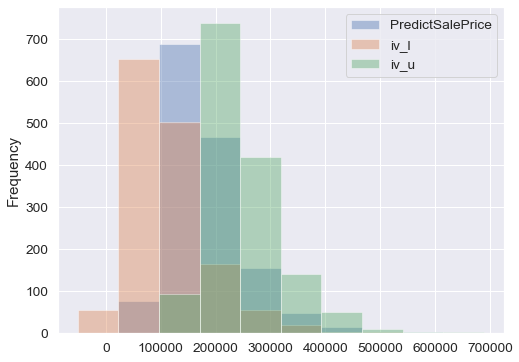

In [209]:
plt.rcParams['figure.figsize'] = (8,6)
pre_std, iv_l, iv_u = wls_prediction_std(LR_model,alpha=0.05)
predict_low_upper = pd.DataFrame([LR_model.predict(),iv_l, iv_u ],index = ['PredictSalePrice', 'iv_l', 'iv_u' ]).T
predict_low_upper.plot(kind = "hist",alpha = 0.4)

通过可视化模型预测的购房价格置信区间，预测的购房价格均包含在置信区间的上界和下界以内，且预测的购房价格主要集中在10万到25万美元范围内

#### 构造非线性随机森林模型预测购房价格走势

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RFR = RandomForestRegressor()
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].values
y = df_train['SalePrice'].values
RFR.fit(X,y)

predict_values = RFR.predict(X)

print(r2_score(y,predict_values))

0.97597666196847


#### 两个模型的评估指标对比结论

通过两个模型在使用相同输入特征下的拟合优度r-squared得分对比，可以很明显的看出RandomForest随机森林的判定系数得分要更胜一筹，模型拟合优度达到了97%的高得分，这说明采用非线性随机森林回归模型相较于传统的线性回归可以大幅度提升模型拟合优度和预测准确率